# Problema 2

Questão 9.3 (ed. 2) ou 7.3 (ed. 3) modificada do livro Digital Communication por Edward A. Lee, David G. Messerschmitt (até ed. 2) e John R. Barry (na ed. 3). Assim, é possível verificar o solucionário para assistência na solução. :^)



$$\Omega_{x}=\left \{ -3,-1,+1,3\right \}$$
$$P_{x}=\left \{ .2,.3,.3,.2\right \}$$
$$\sigma^{2}=.25$$

As regiões de decisão são determinadas por três limiares, o do meio sendo zero. Os outros dois podem ser encontrados ao se levar em consideração em que pontoo receiver é indiferente entre a decisão de $\pm 3$ e $\pm 1$. Esses pontos podem ser expressos por: 

$$|y-3|^{2}-2\sigma^{2} ln(.2)=|y-1|^{2}-2\sigma^{2} ln(.3)$$

$$(y^{2}-6y+9)-(y^{2}-2y+1)=2\sigma^{2}\left[ln(.2)-ln(.3)\right]$$

$$-4y+8=\frac{1}{2}ln\left(\frac{2}{3}\right)$$

$$y=-\frac{1}{4}\left[-8+\frac{1}{2}ln\left(\frac{2}{3}\right)\right]\approx 2.05$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def decisor(x):
    ref=(-8+(np.log(.2/.3))/2)/(-4)
    if x>0:
        if x>ref:
            xr=3
        elif x<ref:
            xr=1
    elif x<0:
        if x>-ref:
            xr=-1
        elif x<-ref:
            xr=-3
    return xr

In [3]:
decisor(-2)


-1

Nota pessoal: Gastei um bom tempo nesse problema tentando fazer e gastei um bom tempo planejando uma solução. Depois vi que não era muito bem o que o problema queria, já que ela _meio_ que não fazia uso de tudo que o problema dava como dado. Ainda assim, acho ela infinitamente mais interessante que essa solução ¬¬. Tendo isso em mente, vou documentá-la aqui, mas se quiser pode ignorá-la e seguir para a próxima questão.

In [4]:
def priorp(g,sy):
    u=np.zeros(len(sy))
    for x in g:
        if x==-3:
            u[0]+=1
        if x==-1:
            u[1]+=1
        if x==1:
            u[2]+=1
        if x==3:
            u[3]+=1
    pr=u/len(g)
    return pr

def windows(n): # retorna os pontos dos intervalos das janelas ativas
    m=[np.int64(0)];
    for i in np.arange(0,len(n)-1,1):
        if n[i-1]!=0 and n[i]==0 and n[i+1]==0:
            m.append(i);
        if n[i-1]==0 and n[i]==0 and n[i+1]!=0:
            m.append(i);
    m.append(np.int64(len(n)))
    t=[]
    for i in np.arange(1,len(m)-1,2):
        t.append(np.floor((m[i]+m[i+1])/2))
    v=np.append(np.array([m[0]]), t[:])
    v=np.append(v,np.array([m[-1]]))
    return v

def decision(x,bins,w):
    if x>=bins[int(w[0])] and x<bins[int(w[1])]:
        xr=a[0]
    if x>=bins[int(w[1])] and x<bins[int(w[2])]:
        xr=a[1]
    if x>=bins[int(w[2])] and x<bins[int(w[3])]:
        xr=a[2]
    if x>=bins[int(w[3])] and x<=bins[int(w[4])]:
        xr=a[3]
    return xr

[ 9. 16. 68. 86. 49. 22.  3.  0.  0.  1.  2. 14. 51. 73. 65. 35. 13.  2.
  2.  0.  0.  7. 14. 42. 63. 62. 43.  9.  1.  0.  0.  1.  6. 28. 64. 56.
 52. 27. 13.  1.]
[ 0.  7. 19. 29. 40.]


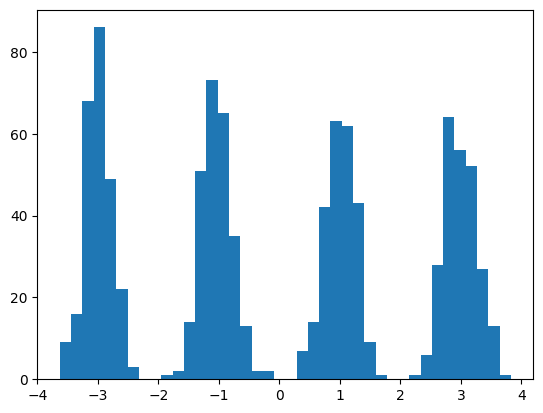

In [5]:
rng=np.random.default_rng(); # set rng
# caso teste
#a=[-1,1];
#p=[-.5,.5];
# caso pedido
a=[-3,-1,1,3]
p=[.2,.3,.3,.2]
s=rng.choice(a,1000,p); # chooses from an array of symbols of specific probabilities
#print(priorp(s,a)) # tentativa de visualizar a prior proability dado o que saiu em s
n=np.random.normal(0,.25,s.shape) # noise at 0 mean and .5 
y=s+n
[n,bins,patches]=plt.hist(y,bins=40)
print(n)
print(windows(n))
# com isso consigo achar a [likelihood function]
# que, nesse caso, é a variável n do histograma
# e onde ela começa e termina pra ser plotada,
# caso isso chegue a ser usado (provavelmente vai)

In [6]:
w=windows(n)
print(w)
print(decision(-2,bins,w))

[ 0.  7. 19. 29. 40.]
-1


Pra tentar explicar rapidamente o que fiz, basicamente tentei encontrar onde cada região começa e termina no histograma, e tirar a média entre os pontos intermediários. Com isso, do começo até o primeiro ponto intermediário (ponto médio entre onde termina o -3 e onde começa o -1, e assim vai) é a região que cobre todos os valores que podem dar -3, assim em diante. Isso é adaptativo para cada transmissão/conjunto de valores que você gera pro sinal e aplica ruído.

Ainda que não tenha sido a resposta exata, foi divertido pensar nesse método e desenvolvê-lo. Só queria meu tempo de volta xdx.